# Deep Learning with Cyrillic Data 
Chase Yakaboski, 10/23/2018

## 1. Data Preparation
    - Image loading function
    - Load in of images 
    - Plot histogram of Labels
    
## 2. Deep Fully Connected Neural Network
    - Preprocess Data
    - Split Data into Training and Testing
    - Define Model
    - Compile Model
    - Run Model
    - Analysis

## 3. Deep Convolutional Neural Network
    - Preprocess Data
    - Split Data into Training and Testing
    - Define Model
    - Compile Model
    - Run Model
    - Analysis

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

print(tf.__version__)

1.11.0


## 1. Data Preparation

In [16]:
#-- Function to Load in Data
#-- This Function expects images to be in seperated folders in which each folder is a different character. 

def load_images(path_to_images='/Users/Chase/Documents/Dartmouth/courses/engs-108/homework/Cyrillic', image_size=40):
    #-- First we change directory to the path to images.
    os.chdir(path_to_images)
    letter_class = [name for name in os.listdir() if os.path.isdir(name)]
    num_classes = len(letter_class)

    images = []
    images_2d = []
    labels = []
    for i in range(0, num_classes):
        for j, file in enumerate(os.listdir(os.path.join(os.getcwd(), letter_class[i]))):
            try:
                path = os.path.join(os.getcwd(), letter_class[i], file)
                im = cv2.imread(path, cv2.IMREAD_UNCHANGED)
                res = cv2.resize(im, dsize=(image_size, image_size))
                r,g,b,a = cv2.split(res)
                im = np.array(a)
                #- Add a dummy dimension
                im = np.expand_dims(im, axis=2)
                images_2d.append(im)
                im_alpha = np.squeeze(im.reshape(-1, image_size**2),axis=0)
                #- Normalize Pixel Values
                im_alpha2 = im_alpha / 255.0 
                images.append(im_alpha2)
                labels.append(i)
            except:
                print('Bad Files:')
                print(path)
                continue
    images = np.array(images)
    labels = np.array(labels)
    images_2d = np.array(images_2d)
    labels_2d = keras.utils.to_categorical(labels, num_classes = num_classes)
    
    return images, images_2d, labels, labels_2d

In [17]:
images, images_2d, labels, labels_2d = load_images(image_size=28)

Bad Files:
/Users/Chase/Documents/Dartmouth/courses/engs-108/homework/Cyrillic/З/.DS_Store


### Now lets plot the labels to make sure each Cyrillic letter has about the same number of samples. 

(array([444., 463., 462., 551., 459., 474., 458., 447., 427., 415., 465.,
        431., 456., 469., 486., 344., 466., 247., 576., 493., 487., 464.,
        461., 433., 446., 470., 431., 508., 438., 459., 424., 448., 465.,
        513.]),
 array([ 0.        ,  0.97058824,  1.94117647,  2.91176471,  3.88235294,
         4.85294118,  5.82352941,  6.79411765,  7.76470588,  8.73529412,
         9.70588235, 10.67647059, 11.64705882, 12.61764706, 13.58823529,
        14.55882353, 15.52941176, 16.5       , 17.47058824, 18.44117647,
        19.41176471, 20.38235294, 21.35294118, 22.32352941, 23.29411765,
        24.26470588, 25.23529412, 26.20588235, 27.17647059, 28.14705882,
        29.11764706, 30.08823529, 31.05882353, 32.02941176, 33.        ]),
 <a list of 34 Patch objects>)

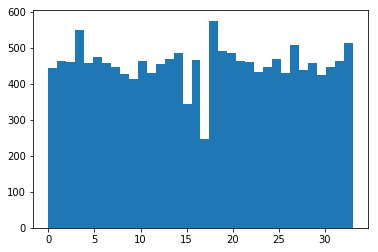

In [18]:
plt.hist(labels, bins=34)

## 3. Deep Convolutional Neural Network

In [25]:
#-- Preprocess
random_seed = 2
samples_train_2d, samples_test_2d, labels_train_2d, labels_test_2d =  train_test_split(images_2d, labels_2d, 
                                                                           test_size=0.1,random_state = random_seed)

In [30]:
np.savetxt("samples_train_2d.csv", samples_train_2d, delimiter=",")
np.savetxt("samples_test_2d.csv", samples_test_2d, delimiter=",")
np.savetxt("labels_train_2d.csv", samples_train_2d, delimiter=",")
np.savetxt("labels_test_2d.csv", samples_train_2d, delimiter=",")

ValueError: Expected 1D or 2D array, got 4D array instead

In [26]:
#-- Build CNN Model
model_cnn = keras.Sequential()
model_cnn.add(keras.layers.Conv2D(input_shape= samples_train_2d[0].shape, 
                                  filters=64, 
                                  kernel_size=(5,5), 
                                  padding='Same', 
                                  activation='relu'))

model_cnn.add(keras.layers.Conv2D(filters=64, 
                                  kernel_size=(5,5), 
                                  padding='Same', 
                                  activation='relu'))

model_cnn.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model_cnn.add(keras.layers.Dropout(0.25))

model_cnn.add(keras.layers.Conv2D(filters=32, 
                                  kernel_size=(3,3), 
                                  padding='Same', 
                                  activation='relu'))

model_cnn.add(keras.layers.Conv2D(filters=32, 
                                  kernel_size=(3,3), 
                                  padding='Same', 
                                  activation='relu'))

model_cnn.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn.add(keras.layers.Dropout(0.25))

model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(256, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.5))
model_cnn.add(keras.layers.Dense(34, activation='softmax'))

In [27]:
# Python optimisation variables
learning_rate = 0.001
epochs = 2
batch_size = 50

#-- Set up the Optimizer
optimizer = tf.train.AdamOptimizer()

In [28]:
#-- Compile the Model
model_cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
history_cnn = model_cnn.fit(samples_train_2d, labels_train_2d, 
                            batch_size=batch_size, 
                            epochs=epochs,
                            validation_data=(samples_test_2d, labels_test_2d))

Train on 13932 samples, validate on 1548 samples
Epoch 1/2
13932/13932 [==============================] - 160s 12ms/step - loss: 4.7520 - acc: 0.1890 - val_loss: 1.4400 - val_acc: 0.6008
Epoch 2/2
13932/13932 [==============================] - 161s 12ms/step - loss: 1.3271 - acc: 0.5930 - val_loss: 0.6900 - val_acc: 0.7913


### Analysis of Accuracy and Loss

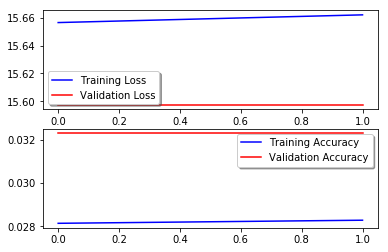

In [10]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history_cnn.history['loss'], color='b', label='Training Loss')
ax[0].plot(history_cnn.history['val_loss'], color='r', label='Validation Loss', axes=ax[0])
legend= ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_cnn.history['acc'], color='b', label='Training Accuracy')
ax[1].plot(history_cnn.history['val_acc'], color='r', label='Validation Accuracy')
legend= ax[1].legend(loc='best', shadow=True)